# Import the packages

In [1]:
import pipeline as pi
from tifffile import imread,imwrite
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
from placozoan.func_segmentation import segmentation_chanvese,get_holes_mask
from placozoan.base_features import SingleObjectFeatures

# Preprocessing

## Steps:
    
    - Increase the contrast of the image 
    - Segmenting the algae plane per plane
    - Removing them from background

In [2]:
start = time.time()

In [3]:
preprocessed,alg_mask = pi.preprocessing('../data/tricho_wound.tif')

Increasing the contrast...
--------------------------------------------------------------
Done with the contrast!
--------------------------------------------------------------
Segmenting the algae...
--------------------------------------------------------------
0.00 % done ...
0.10 % done ...
0.19 % done ...
0.29 % done ...
0.38 % done ...
0.48 % done ...
0.58 % done ...
0.67 % done ...
0.77 % done ...
0.87 % done ...
0.96 % done ...
1.06 % done ...
1.15 % done ...
1.25 % done ...
1.35 % done ...
1.44 % done ...
1.54 % done ...
1.64 % done ...
1.73 % done ...
1.83 % done ...
1.92 % done ...
2.02 % done ...
2.12 % done ...
2.21 % done ...
2.31 % done ...
2.41 % done ...
2.50 % done ...
2.60 % done ...
2.69 % done ...
2.79 % done ...
2.89 % done ...
2.98 % done ...
3.08 % done ...
3.18 % done ...
3.27 % done ...
3.37 % done ...
3.46 % done ...
3.56 % done ...
3.66 % done ...
3.75 % done ...
3.85 % done ...
3.95 % done ...
4.04 % done ...
4.14 % done ...
4.23 % done ...
4.33 % done ...


45.72 % done ...
45.81 % done ...
45.91 % done ...
46.01 % done ...
46.10 % done ...
46.20 % done ...
46.29 % done ...
46.39 % done ...
46.49 % done ...
46.58 % done ...
46.68 % done ...
46.78 % done ...
46.87 % done ...
46.97 % done ...
47.06 % done ...
47.16 % done ...
47.26 % done ...
47.35 % done ...
47.45 % done ...
47.55 % done ...
47.64 % done ...
47.74 % done ...
47.83 % done ...
47.93 % done ...
48.03 % done ...
48.12 % done ...
48.22 % done ...
48.32 % done ...
48.41 % done ...
48.51 % done ...
48.60 % done ...
48.70 % done ...
48.80 % done ...
48.89 % done ...
48.99 % done ...
49.09 % done ...
49.18 % done ...
49.28 % done ...
49.37 % done ...
49.47 % done ...
49.57 % done ...
49.66 % done ...
49.76 % done ...
49.86 % done ...
49.95 % done ...
50.05 % done ...
50.14 % done ...
50.24 % done ...
50.34 % done ...
50.43 % done ...
50.53 % done ...
50.63 % done ...
50.72 % done ...
50.82 % done ...
50.91 % done ...
51.01 % done ...
51.11 % done ...
51.20 % done ...
51.30 % done .

92.20 % done ...
92.30 % done ...
92.40 % done ...
92.49 % done ...
92.59 % done ...
92.69 % done ...
92.78 % done ...
92.88 % done ...
92.97 % done ...
93.07 % done ...
93.17 % done ...
93.26 % done ...
93.36 % done ...
93.46 % done ...
93.55 % done ...
93.65 % done ...
93.74 % done ...
93.84 % done ...
93.94 % done ...
94.03 % done ...
94.13 % done ...
94.23 % done ...
94.32 % done ...
94.42 % done ...
94.51 % done ...
94.61 % done ...
94.71 % done ...
94.80 % done ...
94.90 % done ...
95.00 % done ...
95.09 % done ...
95.19 % done ...
95.28 % done ...
95.38 % done ...
95.48 % done ...
95.57 % done ...
95.67 % done ...
95.77 % done ...
95.86 % done ...
95.96 % done ...
96.05 % done ...
96.15 % done ...
96.25 % done ...
96.34 % done ...
96.44 % done ...
96.54 % done ...
96.63 % done ...
96.73 % done ...
96.82 % done ...
96.92 % done ...
97.02 % done ...
97.11 % done ...
97.21 % done ...
97.31 % done ...
97.40 % done ...
97.50 % done ...
97.59 % done ...
97.69 % done ...
97.79 % done .

# Drift computation

## Steps:

### Computing the drift between each plane

In [4]:
dx, dy = pi.global_drift(alg_mask)

0.00 % done ...
0.10 % done ...
0.19 % done ...
0.29 % done ...
0.38 % done ...
0.48 % done ...
0.58 % done ...
0.67 % done ...
0.77 % done ...
0.87 % done ...
0.96 % done ...
1.06 % done ...
1.15 % done ...
1.25 % done ...
1.35 % done ...
1.44 % done ...
1.54 % done ...
1.64 % done ...
1.73 % done ...
1.83 % done ...
1.92 % done ...
2.02 % done ...
2.12 % done ...
2.21 % done ...
2.31 % done ...
2.41 % done ...
2.50 % done ...
2.60 % done ...
2.69 % done ...
2.79 % done ...
2.89 % done ...
2.98 % done ...
3.08 % done ...
3.18 % done ...
3.27 % done ...
3.37 % done ...
3.46 % done ...
3.56 % done ...
3.66 % done ...
3.75 % done ...
3.85 % done ...
3.95 % done ...
4.04 % done ...
4.14 % done ...
4.23 % done ...
4.33 % done ...
4.43 % done ...
4.52 % done ...
4.62 % done ...
4.72 % done ...
4.81 % done ...
4.91 % done ...
5.00 % done ...
5.10 % done ...
5.20 % done ...
5.29 % done ...
5.39 % done ...
5.49 % done ...
5.58 % done ...
5.68 % done ...
5.77 % done ...
5.87 % done ...
5.97 % d

47.06 % done ...
47.16 % done ...
47.26 % done ...
47.35 % done ...
47.45 % done ...
47.55 % done ...
47.64 % done ...
47.74 % done ...
47.83 % done ...
47.93 % done ...
48.03 % done ...
48.12 % done ...
48.22 % done ...
48.32 % done ...
48.41 % done ...
48.51 % done ...
48.60 % done ...
48.70 % done ...
48.80 % done ...
48.89 % done ...
48.99 % done ...
49.09 % done ...
49.18 % done ...
49.28 % done ...
49.37 % done ...
49.47 % done ...
49.57 % done ...
49.66 % done ...
49.76 % done ...
49.86 % done ...
49.95 % done ...
50.05 % done ...
50.14 % done ...
50.24 % done ...
50.34 % done ...
50.43 % done ...
50.53 % done ...
50.63 % done ...
50.72 % done ...
50.82 % done ...
50.91 % done ...
51.01 % done ...
51.11 % done ...
51.20 % done ...
51.30 % done ...
51.40 % done ...
51.49 % done ...
51.59 % done ...
51.68 % done ...
51.78 % done ...
51.88 % done ...
51.97 % done ...
52.07 % done ...
52.17 % done ...
52.26 % done ...
52.36 % done ...
52.45 % done ...
52.55 % done ...
52.65 % done .

93.84 % done ...
93.94 % done ...
94.03 % done ...
94.13 % done ...
94.23 % done ...
94.32 % done ...
94.42 % done ...
94.51 % done ...
94.61 % done ...
94.71 % done ...
94.80 % done ...
94.90 % done ...
95.00 % done ...
95.09 % done ...
95.19 % done ...
95.28 % done ...
95.38 % done ...
95.48 % done ...
95.57 % done ...
95.67 % done ...
95.77 % done ...
95.86 % done ...
95.96 % done ...
96.05 % done ...
96.15 % done ...
96.25 % done ...
96.34 % done ...
96.44 % done ...
96.54 % done ...
96.63 % done ...
96.73 % done ...
96.82 % done ...
96.92 % done ...
97.02 % done ...
97.11 % done ...
97.21 % done ...
97.31 % done ...
97.40 % done ...
97.50 % done ...
97.59 % done ...
97.69 % done ...
97.79 % done ...
97.88 % done ...
97.98 % done ...
98.08 % done ...
98.17 % done ...
98.27 % done ...
98.36 % done ...
98.46 % done ...
98.56 % done ...
98.65 % done ...
98.75 % done ...
98.85 % done ...
98.94 % done ...
99.04 % done ...
99.13 % done ...
99.23 % done ...
99.33 % done ...
99.42 % done .

### Filtering to find the moments the camera moved

In [5]:
df_drift,res = pi.filtering_drift(dx,dy)

# Visualizing the drift

In [ ]:
canva,diffx,diffy = pi.create_canva(df_drift,preprocessed)

rescaled = pi.place_img(canva,diffx,diffy,preprocessed,df_drift,res)

In [6]:
end = time.time() - start
print(f'The whole pipeline took {end/60:.2f} minutes to complete')

The whole pipeline took 1.90 minutes to complete


# Outputs

## Preprocessed image

In [ ]:
plane = 10
plt.imshow(preprocessed[plane,...])
plt.axis('off')
plt.show()

## Drift of the movie

In [ ]:
df_drift

### Visualization of the direction of the drift

In [ ]:
sns.scatterplot(data=df_drift,x="start",y='displacement',hue='coord')
plt.ylabel('Displacement (pixel)')
plt.xlabel('Start frame')
plt.legend(loc='upper center',title='Displaced coordinate')
plt.show()

## Rescaled image

In [ ]:
plt.imshow(rescaled[800,...])
plt.axis('off')
plt.show()

### Visualizing the full moovement

In [ ]:
plt.imshow(np.mean(rescaled,axis=0))
plt.axis('off')
plt.show()

# Saving the images

## Saving the preprocessed image

In [13]:
path_preprocessed = '../data/tricho_wound_preprocessed_otsu.tif'
imwrite(path_preprocessed,preprocessed)

## Saving the canva

In [14]:
path_canva = '../data/tricho_8_wound_drift_visualization.tif'
imwrite(path_canva,rescaled,compression='zlib') #adding compression to reduce file size

# Segmentation of the preprocessed movie

In [7]:
mask = segmentation_chanvese(preprocessed)

# Extracting the features

## Organism

In [8]:
prop = {'properties': ['label',
   'centroid',
   'area',
   'perimeter',
   'eccentricity',
   'orientation',
   'axis_major_length',
   'axis_minor_length'],
  'extra_properties': ['convexity']}

segmentator = SingleObjectFeatures(mask,preprocessed, params=prop)
df_props = segmentator.get_features()

In [9]:
df_props

,centroid-0,centroid-1,area,perimeter,eccentricity,orientation,axis_major_length,axis_minor_length,convexity
label,,,,,,,,,
1,342.013495,311.734084,228602,2310.494696,0.152406,0.264137,552.347156,545.894647,0
2,342.104803,311.531881,228525,2087.581961,0.148535,0.300885,552.129334,546.004610,0
3,342.035202,311.418546,228852,2135.458116,0.134040,0.283151,551.925134,546.944494,0
4,342.069760,311.382259,228999,2128.529183,0.125840,0.195112,551.941352,547.553700,0
5,342.239911,311.332025,228847,2134.978931,0.112738,0.212959,551.385778,547.870563,0
...,...,...,...,...,...,...,...,...,...
1035,416.996453,344.399873,122359,1794.947402,0.530561,1.117886,441.956535,374.623010,0
1036,416.852605,343.601255,122236,1787.391052,0.532446,1.105567,441.970786,374.112306,0
1037,416.391426,342.537541,122718,1852.237770,0.531168,1.091515,443.180484,375.491908,0


## Wound

In [20]:
wound = get_holes_mask(mask)
segmentator = SingleObjectFeatures(wound,preprocessed, params=prop)
df_props_wound = segmentator.get_features()

In [22]:
laser_frame = 19
df_props_wound = pi.filling_wound(df_props,df_props_wound,laser_frame)

In [12]:
end = time.time() - start
print(f'The whole pipeline took {end/60:.2f} minutes to complete')

The whole pipeline took 25.26 minutes to complete


In [25]:
df_props_wound = pd.DataFrame(df_props_wound)


In [2]:
df_props_pipeline = pd.read_csv('../data/results/figures/complete_pipeline/props_pipeline.csv')
df_props_pipeline_wound = pd.read_csv('../data/results/figures/complete_pipeline/props_wound_pipeline.csv')

df_props = pd.read_csv('../data/results/figures/complete_pipeline/props_compare.csv')
df_props_wound = pd.read_csv('../data/results/figures/complete_pipeline/props_wound_compare.csv')

# Plotting results and extracting features

In [3]:
size_pixel=0.7692 #in microns
laser_frame = 19

In [5]:
df_test = pd.read_csv('../data/results/figures/complete_pipeline/props_corrected_pipeline.csv')

In [154]:
df_props_pipeline_wound

,label,centroid-0,centroid-1,area,perimeter,eccentricity,orientation,axis_major_length,axis_minor_length,convexity
0,3,312.876289,230.804124,97,68.284271,0.869660,0.101149,548.546825,270.791007,15
1,4,360.459770,180.942529,87,67.248737,0.486166,0.611683,454.311054,397.007263,20
2,7,282.893617,180.398936,188,120.947222,0.898144,-0.324852,498.116284,219.021989,7
3,8,276.527778,206.555556,36,27.106602,0.967095,0.084372,476.242008,121.163523,29
4,9,277.434783,161.510870,92,71.112698,0.958843,-0.649229,661.080402,187.705891,17
...,...,...,...,...,...,...,...,...,...,...
542,1032,436.325515,248.358696,1748,368.776695,0.989334,-0.078892,235.870690,34.357664,2
543,1033,441.537297,246.545149,1783,401.060967,0.985385,-0.069071,219.857865,37.450955,1
544,1034,438.348033,247.100715,1678,402.339141,0.992557,-0.086537,257.905312,31.407563,1
545,1037,443.348607,244.565325,1615,381.060967,0.990875,-0.079173,239.729667,32.312076,1


In [140]:
def clean_results(df_org,df_drift,window_size = 1):
    '''
    Parameters
    ----------
    dft : Dataframe
        Dataframe of the organism properties.
    df_drift : Dataframe
        Dataframe of the drift moments.

    Returns
    -------
    dft : Dataframe
        Dataframe of the organism properties with corrected drift and interpolation.

    Worklow
    -------
    
    First remove the laser time point (might create an odd value) for that I just replace the whole line by the one before
    Then the goal is to correct the drift for that:
        -Loop over all planes 
        - if plane in the drift dataframe then correct depending on the corrdinate and the orientation of the movement
    
    TO DO:
        optimize this function that might take a while for big dataframes. Might be a better way to correct the dataframe
        
    '''
    dft = df_org.copy()
    
    for i in dft.index.values:
        index = i 
        
        if i+ window_size > len(dft.index.values) or i-window_size < 0:
            window = i
        else:
            window = window_size
            
        if 2*dft.iloc[i].area < np.mean(dft.iloc[i-window:i+window].area.values):
            dft.loc[i,dft.columns != 'label'] = dft.loc[i-1,dft.columns != 'label']
    
        if index in df_drift.end.values:
            if df_drift[df_drift.end == index].direction.values == 0:
                
                if df_drift[df_drift.end == index].coord.values == 'y':
    
                    dft.loc[index,'centroid-0'] = dft.loc[index,'centroid-0'] - np.abs(df_drift[df_drift.end == index].displacement.values)
                
                else:
                    
                    dft.loc[index,'centroid-1'] = dft.loc[index,'centroid-1'] - np.abs(df_drift[df_drift.end == index].displacement.values)
                    
            else:
                
                if df_drift[df_drift.end == index].coord.values == 'y':
                    
                    dft.loc[index,'centroid-0'] = dft.loc[index,'centroid-0'] + np.abs(df_drift[df_drift.end == index].displacement.values)
                
                else:
                    
                    dft.loc[index,'centroid-1'] = dft.loc[index,'centroid-1'] + np.abs(df_drift[df_drift.end == index].displacement.values)
    return dft

In [141]:
df_tt = clean_results(df_props_pipeline,df_drift)

In [157]:
df_wound_pipeline = pi.interpolate_wound(df_props_pipeline_wound,df_tt,laser_frame)

In [255]:
df_msd = df_test.copy()

## Area

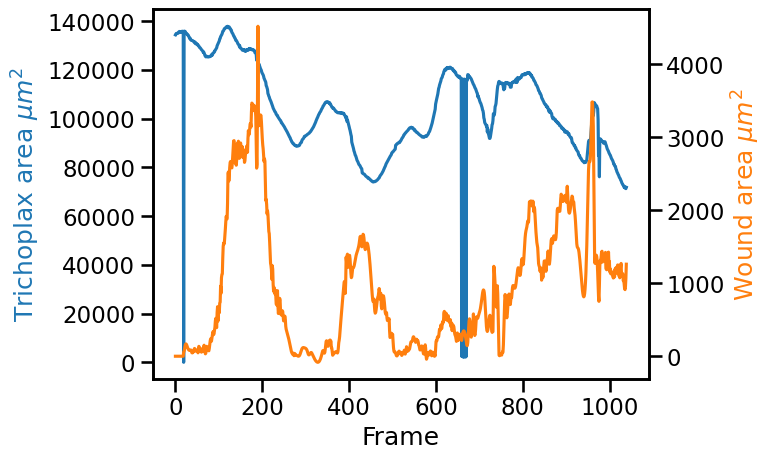

In [158]:
sns.set_context('talk')
fig,ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(x=df_props.index.values,y = df_props.area*(size_pixel)*(size_pixel),ax = ax,color='tab:blue')
sns.lineplot(x=df_wound_pipeline.index.values,y = df_wound_pipeline.area*(size_pixel)*(size_pixel), ax = ax2,color='tab:orange')
ax.set_ylabel('Trichoplax area $\mu m^2$',color = 'tab:blue')
ax2.set_ylabel('Wound area $\mu m^2$',color='tab:orange')
ax.set_xlabel('Frame')
#ax.set_xlim(660,670)
plt.show()

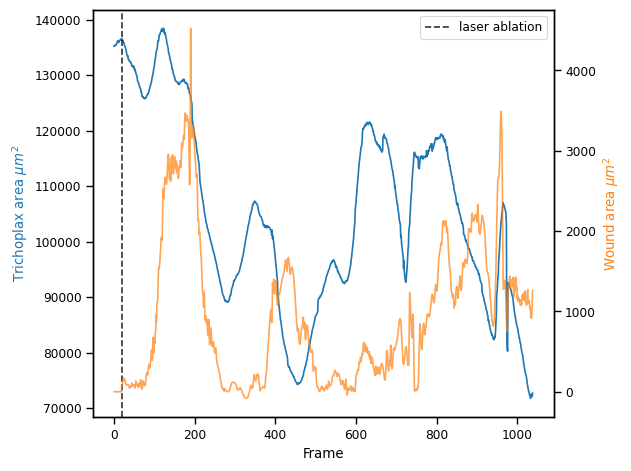

In [159]:
sns.set_context('paper')
fig,ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(x=df_test.index.values,y = df_test.area*(size_pixel)*(size_pixel),ax = ax,color='tab:blue')
sns.lineplot(x=df_wound_pipeline.index.values,y = df_wound_pipeline.area*(size_pixel)*(size_pixel), 
             ax = ax2,color='tab:orange',alpha=0.7)
ax.set_ylabel('Trichoplax area $\mu m^2$',color = 'tab:blue')
ax2.set_ylabel('Wound area $\mu m^2$',color='tab:orange')
ax.set_xlabel('Frame')
ax.axvline(laser_frame,0,ax.get_ylim()[1],linestyle='--',color='black',alpha=0.8,label='laser ablation')
ax.legend()
plt.tight_layout()
plt.savefig('../data/results/figures/complete_pipeline/organism_area_wound_area.png',dpi=300)
plt.show()

## Area organism/wound

In [160]:
area_w = np.array((df_wound_pipeline.area.values))
area_o = np.array((df_tt.area.values))

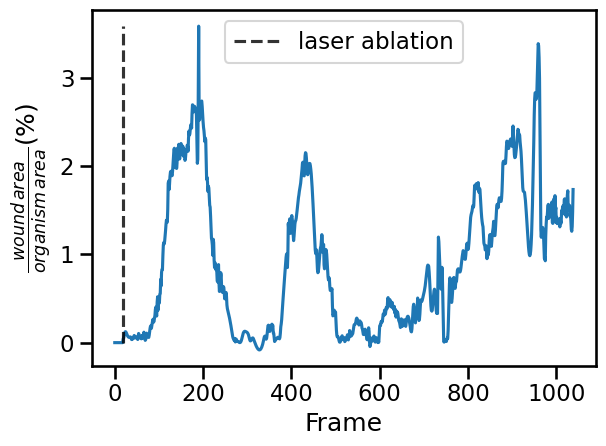

In [161]:
sns.set_context('talk')
sns.lineplot(x = df_props.index.values,y = (area_w/area_o)*100)
plt.ylabel(r"$ \frac{wound\,area}{organism\,area}$" + '(%)')
plt.xlabel('Frame')
plt.vlines(laser_frame,0,max((area_w/area_o)*100),linestyle='--',color='black',alpha=0.8,label='laser ablation')
plt.legend()
plt.tight_layout()
#plt.savefig('../data/results/figures/complete_pipeline/organism_area_divided_wound_area.png',dpi=300)
plt.show()

## Perimeter

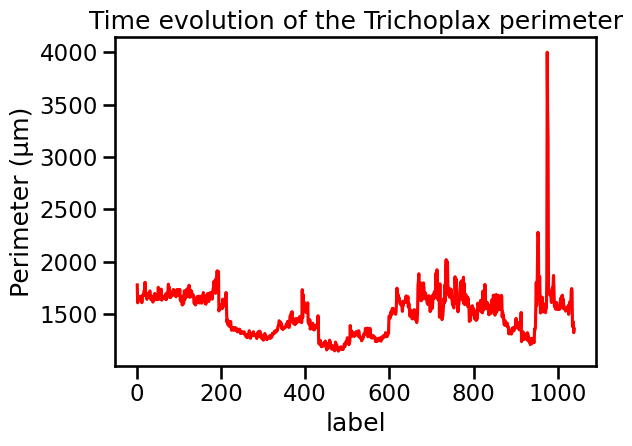

In [127]:
sns.set_context('talk')
sns.lineplot(df_test.perimeter*size_pixel, color='r')
plt.ylabel('Perimeter (µm)')
plt.title('Time evolution of the Trichoplax perimeter')
plt.tight_layout()
plt.savefig('../data/results/figures/complete_pipeline/organism_perimeter.png',dpi=300)

## Trajectory

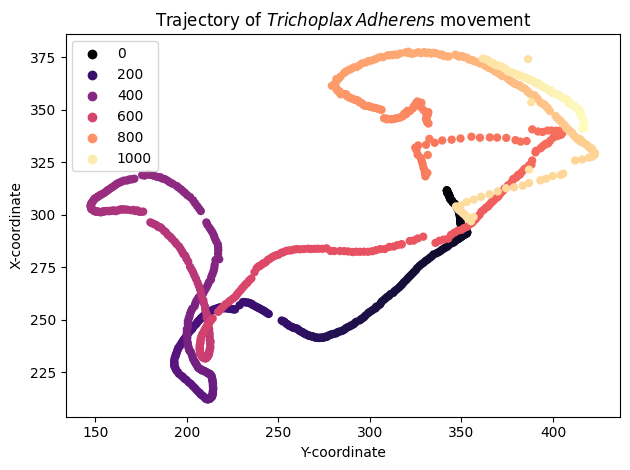

In [22]:
sns.scatterplot(x = df_test['centroid-0'],y = df_test['centroid-1'],marker="o"
                ,hue=df_test.index,palette="magma",linewidth=0)
plt.xlabel('Y-coordinate')
plt.ylabel('X-coordinate')
plt.title("Trajectory of $Trichoplax \, Adherens$ movement")
plt.tight_layout()
plt.savefig('../data/results/figures/complete_pipeline/trajectory.png',dpi=300)
plt.show()

In [7]:
df_test

,label,centroid-0,centroid-1,area,perimeter,eccentricity,orientation,axis_major_length,axis_minor_length,convexity
0,1,342.013495,311.734084,228602,2310.494696,0.152406,0.264137,552.347156,545.894647,0
1,2,342.104803,311.531881,228525,2087.581961,0.148535,0.300885,552.129334,546.004610,0
2,3,342.035202,311.418546,228852,2135.458116,0.134040,0.283151,551.925134,546.944494,0
3,4,342.069760,311.382259,228999,2128.529183,0.125840,0.195112,551.941352,547.553700,0
4,5,342.239911,311.332025,228847,2134.978931,0.112738,0.212959,551.385778,547.870563,0
...,...,...,...,...,...,...,...,...,...,...
1034,1035,416.996453,344.399873,122359,1794.947402,0.530561,1.117886,441.956535,374.623010,0
1035,1036,416.852605,343.601255,122236,1787.391052,0.532446,1.105567,441.970786,374.112306,0
1036,1037,416.391426,342.537541,122718,1852.237770,0.531168,1.091515,443.180484,375.491908,0
1037,1038,417.091537,341.282957,121842,1716.840800,0.533203,1.095242,441.722460,373.691493,0


## Color the trajectory by displacement to see the effect of the correction

In [169]:
def eucldist(df_t,points):
    '''
    Function to compute the eucledian distance
    
    Parameters
    ----------
    df_t : dataframe
        position of te algae at frame t.
    df_t1 : dataframe
        position of te algae at time t plus 1.
    points : list
        the position in the dataframe where to compute the distance.

    Returns
    -------
    dist : int
        the eucledian distance between the 2 points.

    '''
    one = df_t.iloc[points[0]]
    two = df_t.iloc[points[1]]
    # p1 = np.array([one['centroid-1'], one['centroid-0']])
    # p2 = np.array([two['centroid-1'], two['centroid-0']])
    # dist = np.linalg.norm(p1-p2)
    # np.sqrt(np.sum((p1-p2)**2, axis=0))

    diff = (two['centroid-1']-one['centroid-1'])**2 + (two['centroid-0']-one['centroid-0'])**2
    dist = np.sqrt(diff)
    return dist

In [234]:
distance = [0]
for i in range(len(df_tt.index.values)-1):
    distance.append(eucldist(df_tt,[i,i+1]))

#distance = distance/np.max(distance)

#distance

In [235]:
df_compa = df_props.copy()

In [236]:
distance_b = [0]
for i in range(len(df_compa.index.values)-1):
    distance_b.append(eucldist(df_compa,[i,i+1]))
    
#distance_b = distance_b/np.max(distance_b)

In [237]:
df_tt.loc[:,'displacement'] = distance

In [238]:
df_compa.loc[:,'displacement'] = distance_b

In [264]:
df_td = df_tt.copy()
df_comp = df_compa.copy()

In [265]:
fmin = 700 
fmax = 800 

df_td = df_td.iloc[fmin:fmax]
df_comp = df_comp.iloc[fmin:fmax]

In [266]:
for i in df_td.index.values:
    df_td.loc[i,'displacement'] = df_td.loc[i,'displacement']/np.max(df_td.displacement)
    df_comp.loc[i,'displacement'] = df_comp.loc[i,'displacement']/np.max(df_comp.displacement)

<AxesSubplot:>

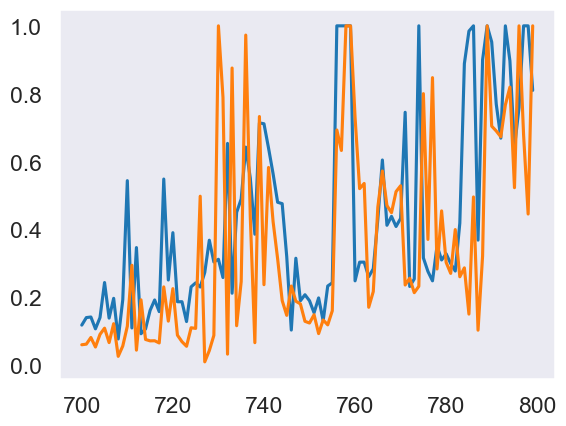

In [267]:
df_comp.displacement.plot()
df_td.displacement.plot()

In [272]:
df_td['centroid-1'].values[0]

317.4385284090286

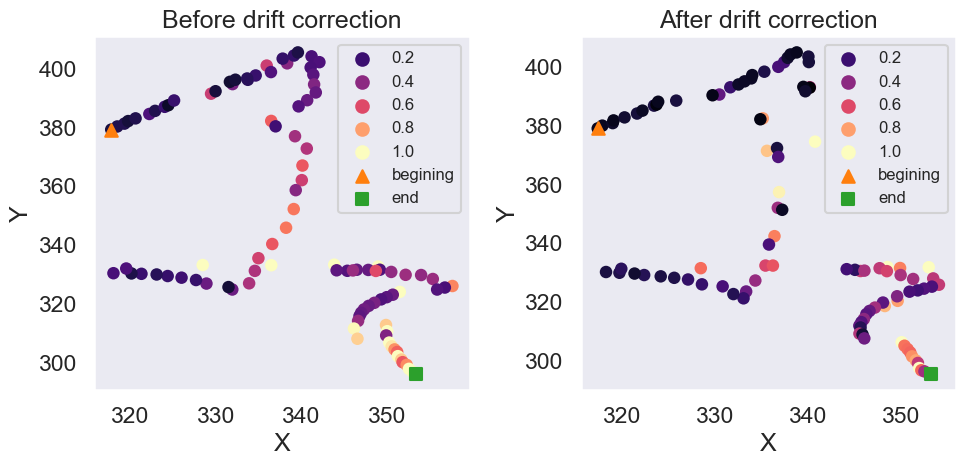

In [278]:
sns.set_style("dark")

fig,ax = plt.subplots(1,2,figsize=(10,5))

sns.scatterplot(data = df_td , y = 'centroid-0',x = 'centroid-1',marker="o"
                ,hue='displacement',palette="magma",linewidth=0,ax=ax[1]
               ,hue_norm = (0,1))
ax[1].scatter(y = df_td['centroid-0'].values[0],x = df_td['centroid-1'].values[0]
                ,marker="^",label='begining')
ax[1].scatter(y = df_td['centroid-0'].values[-1],x = df_td['centroid-1'].values[-1]
                ,marker="s",label='end')


sns.scatterplot(data=df_comp,y = 'centroid-0',x = 'centroid-1',marker="o"
                ,hue='displacement',palette="magma",linewidth=0,ax=ax[0],
                hue_norm = (0,1))
ax[0].scatter(y = df_comp['centroid-0'].values[0],x = df_comp['centroid-1'].values[0]
                ,marker="^",label='begining')
ax[0].scatter(y = df_comp['centroid-0'].values[-1],x = df_comp['centroid-1'].values[-1]
                ,marker="s",label='end')


#plt.xlabel('Y-coordinate')
#plt.ylabel('X-coordinate')
#plt.title('Trajectory of Placozoa movement')
ax[0].set_title('Before drift correction')
ax[1].set_title('After drift correction')

for ax in ax:
    #ax.axis('off')
    ax.legend(prop={'size': 12})
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

plt.tight_layout()
plt.savefig('../data/results/figures/complete_pipeline/correct_traj_norm.png',dpi=300)
plt.show()

## Adding the manually computed drift

Workflow:
   - Load dataframe
   - Correct the dataframe with the manually computed drift
   - compute displacement
   - crop dataframe
   - normalize
   - plot trajectory
    

In [23]:
dx2 = []
dy2 = []


e = pd.read_csv('../data/pos_alg_true_3.csv',sep=';')
#print(e.head())
e = e[['Y','X','Slice']]

for j in range(1,len(e.index)):
    if e.iloc[j].Slice == e.iloc[j-1].Slice + 1:
        dx2.append(pi.distance(e,[j-1,j])[0])
        dy2.append(pi.distance(e,[j-1,j])[1])      
e

,Y,X,Slice
0,434.0,47.0,725
1,429.0,48.0,726
2,422.0,47.0,727
3,416.0,46.0,728
4,409.0,46.0,729
5,403.0,47.0,730
6,395.0,47.0,731
7,0.0,0.0,10000
8,387.0,46.0,732
9,379.0,47.0,733


In [285]:
df_drift_true = df_drift.copy()

In [295]:
disp = []

for i in range(len(dx2)):
    if np.abs(dx2[i]) > np.abs(dy2[i]):
        disp.append(int(dx2[i]))
    else:
        disp.append(int(dy2[i]))
disp

[-5,
 -7,
 -6,
 -7,
 -6,
 -8,
 -8,
 -7,
 -10,
 -9,
 -11,
 -11,
 -9,
 -9,
 -9,
 -8,
 -10,
 -6,
 -8,
 -2,
 -1,
 1,
 2,
 11,
 9,
 9,
 -1,
 1,
 -4,
 -8,
 -7,
 -9,
 -6,
 -10,
 -7,
 -6,
 -8,
 -9,
 -6,
 -8,
 -7,
 -7,
 -8,
 -7,
 -8,
 -7,
 -5]

In [296]:
df_drift_true.loc[:,'displacement'] = np.abs(disp)
df_drift_true

C:\Users\nessl\AppData\Local\Temp\ipykernel_20652\1501475803.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_drift_true.loc[:,'displacement'] = np.abs(disp)


,start,end,direction,coord,displacement
0,725,726,0,y,5
1,726,727,0,y,7
2,727,728,0,y,6
3,728,729,0,y,7
4,729,730,0,y,6
5,730,731,0,y,8
6,732,733,0,y,8
7,733,734,0,y,7
8,734,735,0,y,10
9,735,736,0,y,9


In [297]:
df_true = clean_results(df_props_pipeline,df_drift_true)

C:\Users\nessl\miniconda3\envs\placozoa\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\nessl\miniconda3\envs\placozoa\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [299]:
distance_t = [0]
for i in range(len(df_true.index.values)-1):
    distance_t.append(eucldist(df_true,[i,i+1]))

In [300]:
df_true.loc[:,'displacement'] = distance_t
df_tr = df_true.copy()

In [301]:
fmin = 700 
fmax = 800 

df_tr = df_tr.iloc[fmin:fmax]
for i in df_tr.index.values:
    df_tr.loc[i,'displacement'] = df_tr.loc[i,'displacement']/np.max(df_tr.displacement)

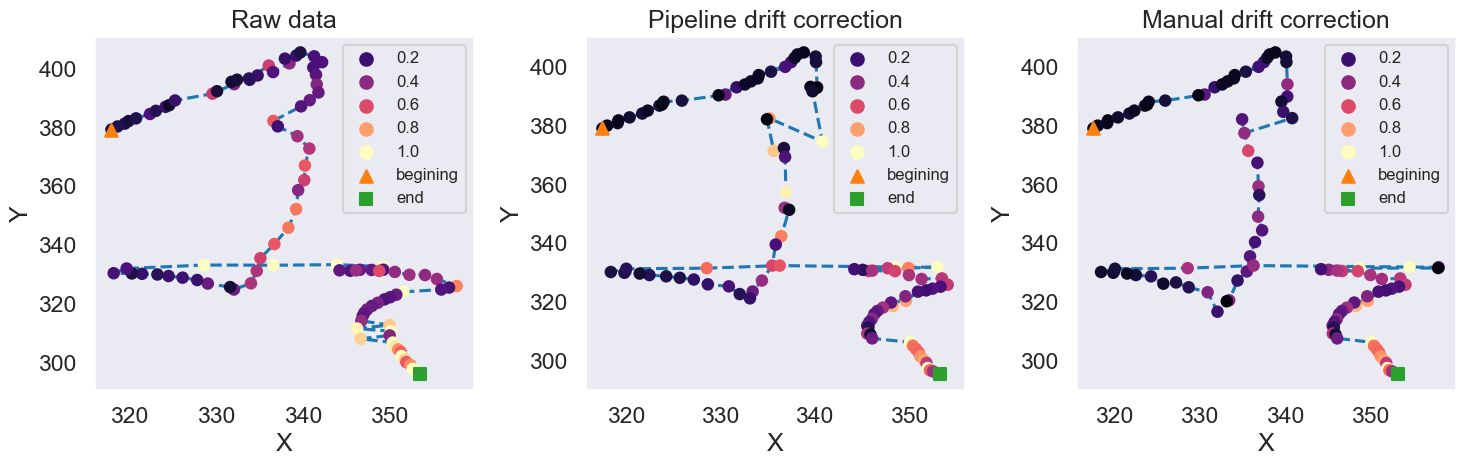

In [349]:
sns.set_style("dark")

fig,ax = plt.subplots(1,3,figsize=(15,5))
df_l = [df_comp,df_td,df_tr]
leg = ['Raw data','Pipeline drift correction','Manual drift correction']

for ax,df,name in zip(ax,df_l,leg):
    #Trajectory
    sns.scatterplot(data=df,y = 'centroid-0',x = 'centroid-1',marker="o"
                ,hue='displacement',palette="magma",linewidth=0,ax=ax,
                hue_norm = (0,1),zorder=1)
    #Begining point
    ax.scatter(y = df['centroid-0'].values[0],x = df['centroid-1'].values[0]
                ,marker="^",label='begining',zorder=2)
    #End point
    ax.scatter(y = df['centroid-0'].values[-1],x = df['centroid-1'].values[-1]
                ,marker="s",label='end',zorder=2)
    #Trajectoy (line)
    ax.plot(df['centroid-1'],df['centroid-0'],color='tab:blue',linestyle='--'
           ,zorder=0)
    #Style
    ax.legend(prop={'size': 12})
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_title(name)

plt.tight_layout()
plt.savefig('../data/results/figures/complete_pipeline/correct_traj_norm_comp.png',dpi=300)
plt.show()

In [320]:
mask = imread('../data/results/chan_vese/tricho_wound_preprocessed_otsu_masked.tif')

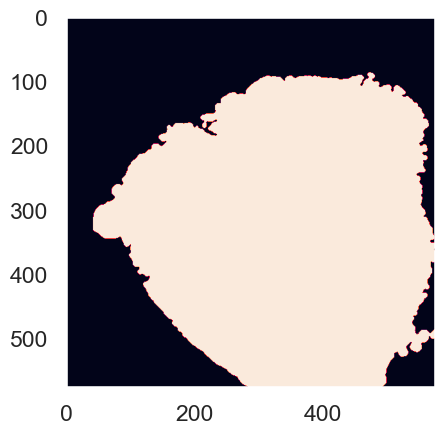

In [330]:
plt.imshow(mask[758,...])

In [332]:
df_drift

,start,end,direction,coord,displacement
0,725,726,0,y,6
1,726,727,0,y,4
2,727,728,0,y,1
3,728,729,0,y,0
4,729,730,0,y,14
5,730,731,0,y,3
6,732,733,0,y,8
7,733,734,0,y,2
8,734,735,0,y,0
9,735,736,0,y,8


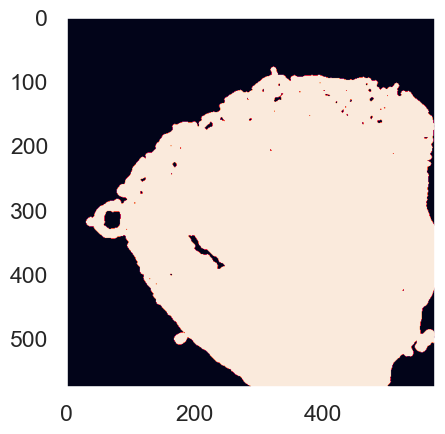

In [331]:
plt.imshow(mask[759,...])

In [316]:
df_tr.iloc[50:60]

,label,centroid-0,centroid-1,area,perimeter,eccentricity,orientation,axis_major_length,axis_minor_length,convexity,displacement
750,751,328.812497,324.190282,194984,2056.003318,0.217411,-1.043782,512.082500,499.833610,0,0.157825
751,752,329.255970,322.414867,194624,2042.298736,0.220741,-1.049203,511.334930,498.721551,0,0.100043
752,753,329.759211,321.384836,194527,2024.150504,0.203934,-1.095465,510.143000,499.422113,0,0.062673
753,754,330.028966,319.766652,194915,2077.003318,0.198066,-1.191558,509.831548,499.731132,0,0.089686
754,755,330.287902,318.327002,194681,2084.038851,0.171757,-1.230651,507.836468,500.289662,0,0.079968
755,756,331.386028,319.964886,191631,2412.223664,0.082573,-1.124398,501.253785,499.542031,0,0.107805
756,757,331.593281,328.485376,192253,2248.785063,0.137166,1.442666,503.563000,498.803351,0,0.465948
757,758,332.478388,336.214908,191217,2389.981023,0.165440,1.153117,503.713204,496.771991,0,0.425330
758,759,331.981342,354.499917,192622,2363.797257,0.184643,1.263549,506.706925,497.994457,0,1.000000
759,760,331.912150,357.913106,194456,2112.334270,0.217751,1.338417,510.598257,498.346130,0,0.371321


# MSD

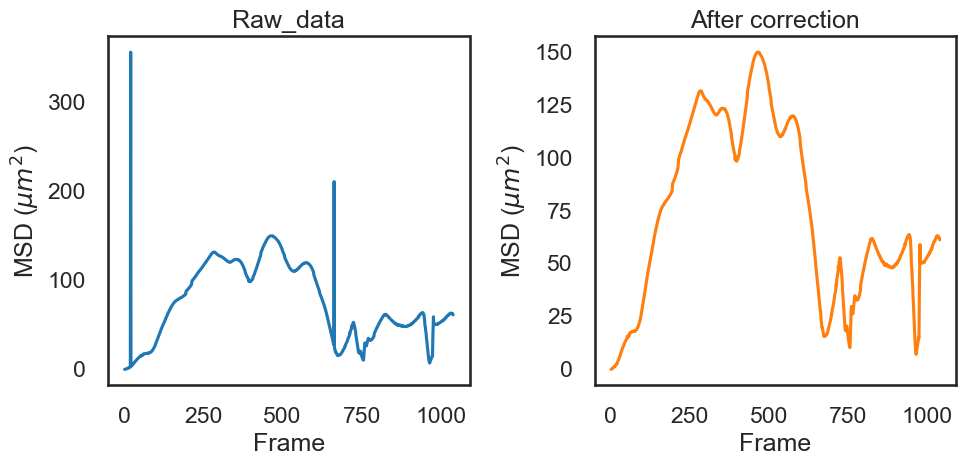

In [297]:
xdata = df_props['centroid-1'].values
ydata = df_props['centroid-0'].values
MSD = []
xdata_c = df_test['centroid-1'].values
ydata_c = df_test['centroid-0'].values
MSD_c = []

for i in range(len(xdata)):
    MSD.append(np.sqrt(((xdata[i]-xdata[0])*size_pixel)**2+((ydata[i]-ydata[0])*size_pixel)**2))
    MSD_c.append(np.sqrt(((xdata_c[i]-xdata_c[0])*size_pixel)**2+((ydata_c[i]-ydata_c[0])*size_pixel)**2))
    
fig,ax = plt.subplots(1,2, figsize=(10,5))

sns.lineplot(x = df_test.index.values,y = MSD,ax=ax[0],color='tab:blue')
sns.lineplot(x = df_test.index.values,y = MSD_c,ax=ax[1],color='tab:orange')
ax[0].set_title('Raw_data')
ax[1].set_title('After correction')

for ax in ax:
    ax.set_ylabel('MSD ($µm^2$)')
    ax.set_xlabel('Frame')

plt.tight_layout()
#plt.xlim(700,780)
plt.savefig('../data/results/figures/complete_pipeline/correct_MSD_comp.png',dpi=300)
plt.show()

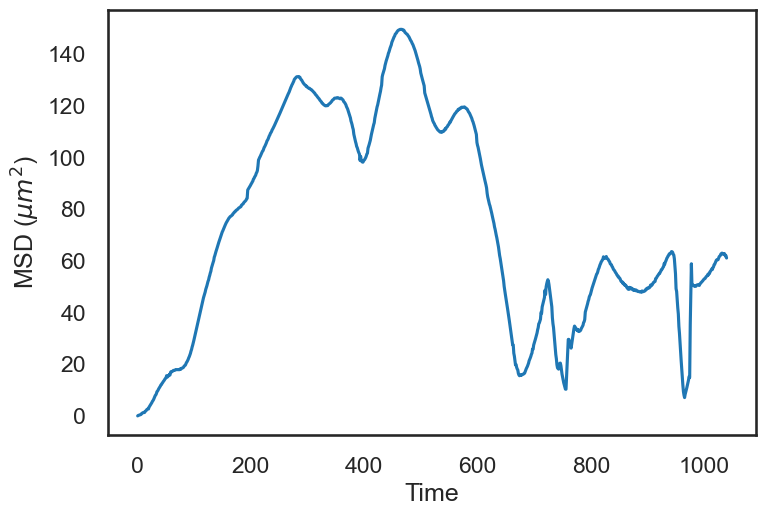

In [294]:
sns.set_style("white")
sns.set_context('talk')

xdata = df_test['centroid-1'].values
ydata = df_test['centroid-0'].values
MSD = []
for i in range(len(xdata)):
    MSD.append(np.sqrt(((xdata[i]-xdata[0])*size_pixel)**2+((ydata[i]-ydata[0])*size_pixel)**2))
    
sns.lineplot(x = df_test.index.values,y = MSD,color='tab:blue')
plt.ylabel('MSD ($µm^2$)')
plt.xlabel('Time')
#plt.xlim(700,780)
plt.tight_layout()
plt.savefig('../data/results/figures/complete_pipeline/correct_MSD.png',dpi=300)
plt.show()

In [307]:
df_props.to_csv('../data/results/figures/complete_pipeline/props_pipeline.csv')
df_test.to_csv('../data/results/figures/complete_pipeline/props_corrected_pipeline.csv')

In [308]:
df_props_wound.to_csv('../data/results/figures/complete_pipeline/props_wound_pipeline.csv')

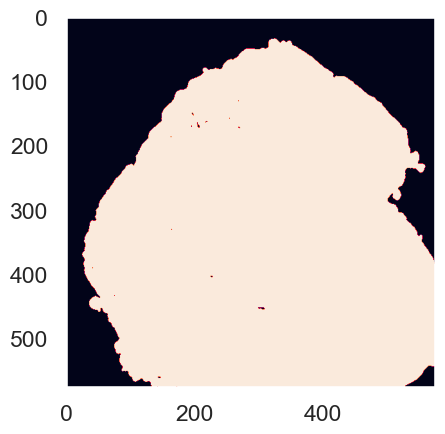

In [352]:
plt.imshow(mask[0,...])

In [361]:
image = mask[4,...].copy()

pixels=[]

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j]>0:
            pixels.append((i,j))
            

576 576
(228613, 2)
======= Scale : 1.0069555500567189
======= Scale : 1.0784804316944516
======= Scale : 1.1550857845535842
======= Scale : 1.2371324786871727
======= Scale : 1.3250070170452075
======= Scale : 1.4191233562003824
======= Scale : 1.5199248564015158
======= Scale : 1.6278863701408692
======= Scale : 1.7435164790741244
======= Scale : 1.8673598898306263
The Hausdorff dimension is 1.9976829977141561


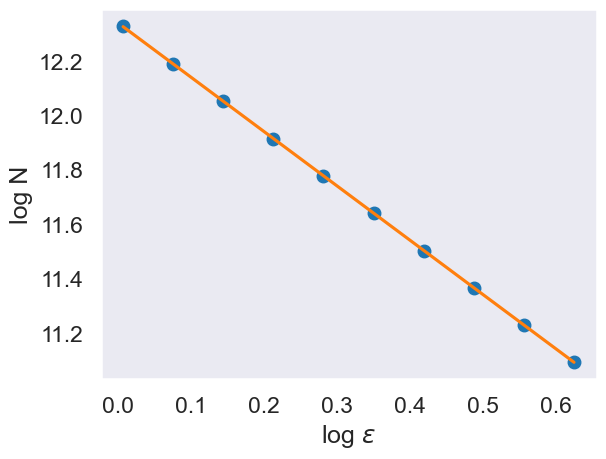

In [360]:
Lx=image.shape[1]
Ly=image.shape[0]
print (Lx, Ly)
pixels=np.array(pixels)
print (pixels.shape)

# computing the fractal dimension
#considering only scales in a logarithmic list
scales=np.logspace(0.01, 1, num=10, endpoint=False, base=2)
Ns=[]
# looping over several scales
for scale in scales:
    print ("======= Scale :",scale)
    # computing the histogram
    H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
    Ns.append(np.sum(H>0))

# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)

plt.plot(np.log(scales),np.log(Ns), 'o')
plt.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
plt.xlabel('log $\epsilon$')
plt.ylabel('log N')

print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficientv

In [368]:
def fractality(mask,plane):
    image = mask[plane,...].copy()

    pixels=[]

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>0:
                pixels.append((i,j))
    Lx=image.shape[1]
    Ly=image.shape[0]
    #print (Lx, Ly)
    pixels=np.array(pixels)
    #print (pixels.shape)

    # computing the fractal dimension
    #considering only scales in a logarithmic list
    scales=np.logspace(0.01, 1, num=10, endpoint=False, base=2)
    Ns=[]
    # looping over several scales
    for scale in scales:
        #print ("======= Scale :",scale)
        # computing the histogram
        H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
        Ns.append(np.sum(H>0))

    # linear fit, polynomial of degree 1
    coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)

    #plt.plot(np.log(scales),np.log(Ns), 'o')
    #plt.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
    #plt.xlabel('log $\epsilon$')
    #plt.ylabel('log N')

    print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficientv

In [366]:
fractality(10)
fractality(100)
fractality(756)
fractality(0)

The Hausdorff dimension is 1.9977681850455065
The Hausdorff dimension is 1.992981767405122
The Hausdorff dimension is 1.9923494333146665
The Hausdorff dimension is 1.9976829977141561


In [367]:
mask_r = imread('../data/results/chan_vese/placozoan-movie_masked_chanvese.tif')

In [370]:
fractality(mask_r,10)
fractality(mask_r,100)
#fractality(mask_r,756)
fractality(mask_r,0)

The Hausdorff dimension is 1.991929408045
The Hausdorff dimension is 1.992501728693407
The Hausdorff dimension is 1.9930836999763164
